In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_train[0].shape

(32, 32, 3)

In [5]:
import matplotlib.pyplot as plt

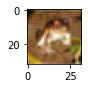

In [6]:
plt.figure(figsize=(10,1))
plt.imshow(x_train[0])

In [7]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [8]:
classes=['Airplane','Automobile','bird','cat','deer','dog','frog','hourse','ship','truck']

In [9]:
x_train_re=x_train/255
x_test_re=x_test/255

In [10]:
x_train_re[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [11]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [12]:
y_train_re=y_train.reshape(-1,)

In [13]:
y_train_re[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [14]:
ann=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
ann.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [15]:
ann.fit(x_train_re,y_train_re,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 142s 84ms/step - loss: 1.8154 - accuracy: 0.3535
Epoch 2/5
1563/1563 [==============================] - 133s 85ms/step - loss: 1.6234 - accuracy: 0.4257
Epoch 3/5
1563/1563 [==============================] - 135s 87ms/step - loss: 1.5437 - accuracy: 0.4554
Epoch 4/5
1563/1563 [==============================] - 149s 95ms/step - loss: 1.4835 - accuracy: 0.4780
Epoch 5/5
1563/1563 [==============================] - 135s 86ms/step - loss: 1.4323 - accuracy: 0.4959


In [16]:
y_test_re=y_test.reshape(-1,)

In [17]:
ann.evaluate(x_test_re,y_test_re)

313/313 [==============================] - 25s 30ms/step - loss: 1.4905 - accuracy: 0.4643


[1.490546703338623, 0.4643000066280365]

In [18]:
y_predicted=ann.predict(x_test_re)

In [19]:
y_predicted[0]

array([0.26334757, 0.40074486, 0.716118  , 0.8721109 , 0.45455122,
       0.82080364, 0.7750112 , 0.07033327, 0.66832626, 0.14674693],
      dtype=float32)

In [20]:
def predicte(x):
    return classes[np.argmax(x)]

In [21]:
predicte(y_predicted[0])

'cat'

In [22]:
def show_image(x):
    plt.figure(figsize=(10,1))
    plt.imshow(x_test[x])

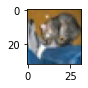

In [23]:
show_image(0)

In [24]:
y_predicted_final=[np.argmax(x) for x in y_predicted]

In [25]:
y_predicted_final[:5]

[3, 9, 8, 8, 4]

In [26]:
y_test_re

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [27]:
cm=tf.math.confusion_matrix(labels=y_test_re,predictions=y_predicted_final)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[487,  11, 173,   4,  36,  17,  29,  16, 168,  59],
       [ 69, 286,  33,  14,  20,  40,  24,  20, 129, 365],
       [ 45,  11, 448,  41, 138,  89, 140,  30,  33,  25],
       [ 26,   2, 167, 212,  53, 239, 150,  31,  35,  85],
       [ 40,   1, 207,  27, 410,  67, 154,  43,  26,  25],
       [ 15,   1, 161, 109,  78, 411, 109,  39,  39,  38],
       [  9,   1, 109,  32,  94,  59, 632,  15,  23,  26],
       [ 32,   2, 129,  37, 113,  96,  53, 414,  24, 100],
       [ 85,  17,  57,  13,  25,  23,  14,   8, 674,  84],
       [ 43,  43,  40,  21,  20,  27,  28,  21,  88, 669]])>

Text(69.0, 0.5, 'Truth')

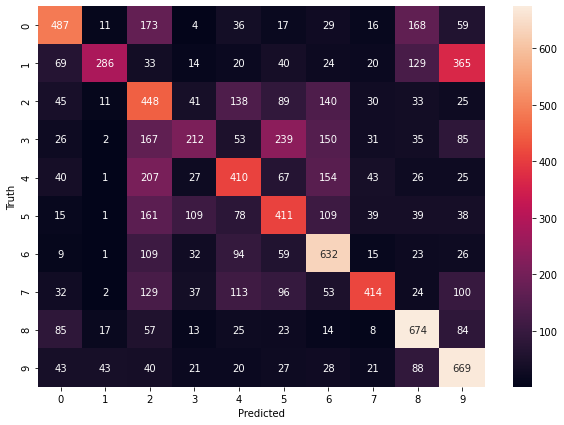

In [28]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [29]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
print(classification_report(y_test,y_predicted_final))

              precision    recall  f1-score   support

           0       0.57      0.49      0.53      1000
           1       0.76      0.29      0.42      1000
           2       0.29      0.45      0.35      1000
           3       0.42      0.21      0.28      1000
           4       0.42      0.41      0.41      1000
           5       0.38      0.41      0.40      1000
           6       0.47      0.63      0.54      1000
           7       0.65      0.41      0.51      1000
           8       0.54      0.67      0.60      1000
           9       0.45      0.67      0.54      1000

    accuracy                           0.46     10000
   macro avg       0.50      0.46      0.46     10000
weighted avg       0.50      0.46      0.46     10000



## By Using CNN

In [34]:
cnn=keras.Sequential([
    keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [35]:
cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [37]:
cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 71s 42ms/step - loss: 1.3630 - accuracy: 0.5173
Epoch 2/10
1563/1563 [==============================] - 66s 42ms/step - loss: 1.1874 - accuracy: 0.5852
Epoch 3/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.0487 - accuracy: 0.6372
Epoch 4/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.9613 - accuracy: 0.6684
Epoch 5/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.8920 - accuracy: 0.6942
Epoch 6/10
1563/1563 [==============================] - 91s 58ms/step - loss: 0.8324 - accuracy: 0.7132
Epoch 7/10
1563/1563 [==============================] - 90s 57ms/step - loss: 0.7888 - accuracy: 0.72850s - loss: 0.7887 - accuracy
Epoch 8/10
1563/1563 [==============================] - 123s 79ms/step - loss: 0.7413 - accuracy: 0.7465
Epoch 9/10
1563/1563 [==============================] - 114s 73ms/step - loss: 0.7040 - accuracy: 0.7593
Epoch 10/10
1563/1563 [===========

In [38]:
y_predicted=cnn.predict(x_test)

In [39]:
y_predicted_final=[np.argmax(x) for x in y_predicted]

In [43]:
y_predicted_final[:10]

[3, 1, 0, 0, 4, 6, 5, 6, 3, 1]

In [44]:
y_test_re[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

In [45]:
cnn.evaluate(x_train,y_train)

1563/1563 [==============================] - 46s 15ms/step - loss: 0.5478 - accuracy: 0.81350s - loss: 0


[0.547806441783905, 0.8134599924087524]

In [46]:
print(classification_report(y_test,y_predicted_final))

              precision    recall  f1-score   support

           0       0.71      0.68      0.69      1000
           1       0.76      0.80      0.78      1000
           2       0.50      0.62      0.56      1000
           3       0.44      0.54      0.48      1000
           4       0.57      0.61      0.59      1000
           5       0.60      0.50      0.54      1000
           6       0.73      0.73      0.73      1000
           7       0.76      0.66      0.70      1000
           8       0.78      0.74      0.76      1000
           9       0.83      0.67      0.74      1000

    accuracy                           0.65     10000
   macro avg       0.67      0.65      0.66     10000
weighted avg       0.67      0.65      0.66     10000

